<a href="https://colab.research.google.com/github/WaleedAhmed565/Ai-lab1/blob/main/AI_lab_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


***Question 1***

***task 1***

In [3]:
!apt-get install -y graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


Binary Tree Traversals:


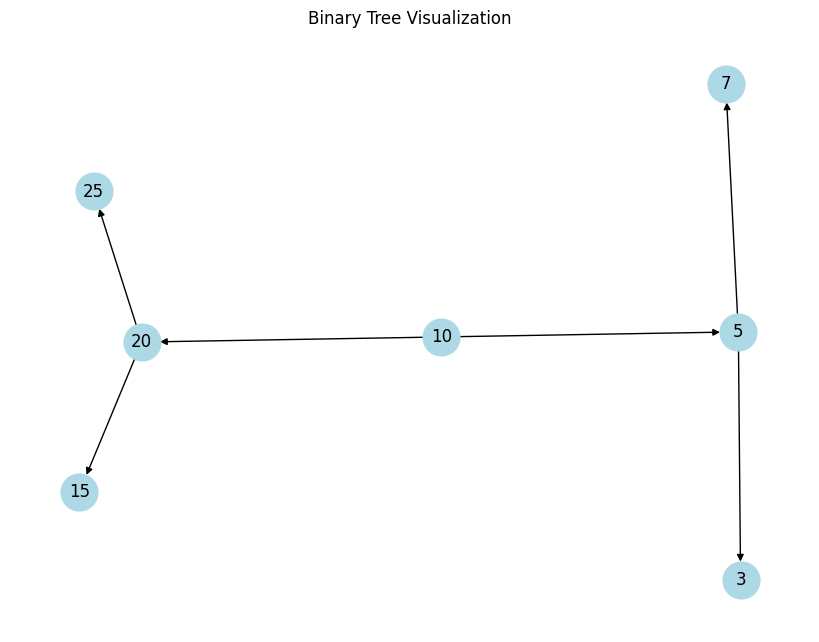

Tree BFS Time: 0.000006s, Order: [10, 5, 20, 3, 7]
Tree DFS Time: 0.000003s, Order: [10, 5, 3, 7]

Graph Traversals:


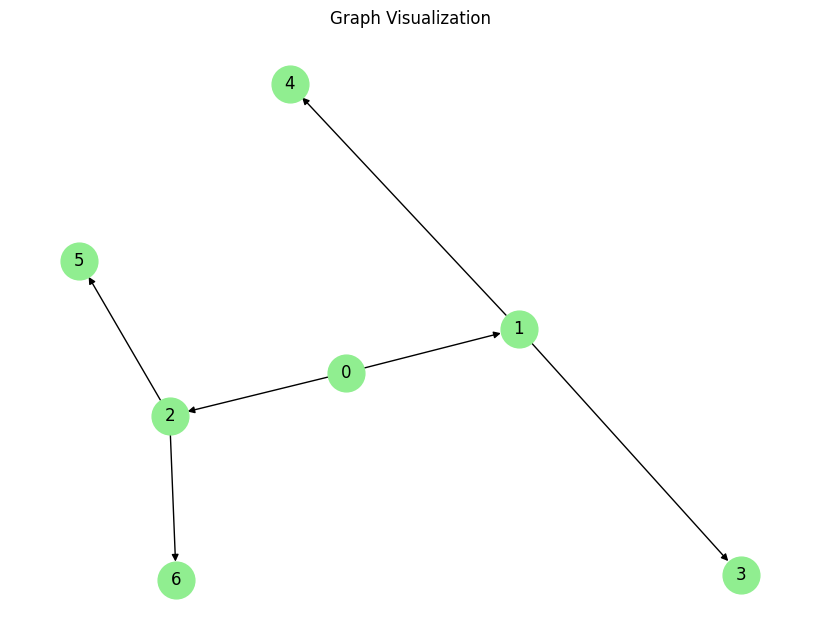

Graph BFS Time: 0.000007s, Order: [0, 1, 2, 3, 4, 5]
Graph DFS Time: 0.000005s, Order: [0, 1, 3, 4, 2, 5]


In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt
from collections import defaultdict, deque
import networkx as nx

# Tree Node and Tree Class
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

class Tree:
    def __init__(self):
        self.root = None

    def bulk_insert(self, values):
        """Bulk inserts values into the tree in level order."""
        if not values:
            return

        self.root = Node(values[0])
        queue = deque([self.root])
        index = 1

        while queue and index < len(values):
            node = queue.popleft()

            if index < len(values):
                node.left = Node(values[index])
                queue.append(node.left)
                index += 1

            if index < len(values):
                node.right = Node(values[index])
                queue.append(node.right)
                index += 1

    def bfs(self, target):
        """Breadth-First Search."""
        if not self.root:
            return -1, []

        start_time = time.time()
        queue = deque([self.root])
        order = []

        while queue:
            node = queue.popleft()
            order.append(node.value)
            if node.value == target:
                return time.time() - start_time, order

            if node.left:
                queue.append(node.left)
            if node.right:
                queue.append(node.right)

        return time.time() - start_time, order

    def dfs(self, target):
        """Depth-First Search."""
        start_time = time.time()
        order = []

        def dfs_helper(node):
            if not node:
                return False

            order.append(node.value)
            if node.value == target:
                return True

            return dfs_helper(node.left) or dfs_helper(node.right)

        dfs_helper(self.root)
        return time.time() - start_time, order

# Graph Class
class Graph:
    def __init__(self):
        self.graph = defaultdict(list)

    def add_edge(self, u, v):
        self.graph[u].append(v)

    def bfs(self, start, target):
        """Breadth-First Search."""
        start_time = time.time()
        visited = set()
        queue = deque([start])
        visited.add(start)
        order = []

        while queue:
            vertex = queue.popleft()
            order.append(vertex)
            if vertex == target:
                return time.time() - start_time, order

            for neighbor in self.graph[vertex]:
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append(neighbor)

        return time.time() - start_time, order

    def dfs(self, start, target):
        """Depth-First Search."""
        start_time = time.time()
        visited = set()
        order = []

        def dfs_helper(vertex):
            if vertex in visited:
                return False

            visited.add(vertex)
            order.append(vertex)

            if vertex == target:
                return True

            for neighbor in self.graph[vertex]:
                if dfs_helper(neighbor):
                    return True

            return False

        dfs_helper(start)
        return time.time() - start_time, order

# Visualization Functions
def visualize_tree(tree):
    """Visualizes a binary tree using NetworkX."""
    if not tree.root:
        print("The tree is empty!")
        return

    graph = nx.DiGraph()

    def add_edges(node):
        if node:
            if node.left:
                graph.add_edge(node.value, node.left.value)
                add_edges(node.left)
            if node.right:
                graph.add_edge(node.value, node.right.value)
                add_edges(node.right)

    add_edges(tree.root)

    pos = nx.spring_layout(graph)
    plt.figure(figsize=(8, 6))
    nx.draw(graph, pos, with_labels=True, node_size=700, node_color='lightblue')
    plt.title("Binary Tree Visualization")
    plt.show()

def visualize_graph(graph):
    """Visualizes a graph using NetworkX."""
    nx_graph = nx.DiGraph(graph.graph)

    pos = nx.spring_layout(nx_graph)
    plt.figure(figsize=(8, 6))
    nx.draw(nx_graph, pos, with_labels=True, node_size=700, node_color='lightgreen')
    plt.title("Graph Visualization")
    plt.show()

# Main Function
def main():
    # Binary Tree Example
    tree_values = [10, 5, 20, 3, 7, 15, 25]
    tree = Tree()
    tree.bulk_insert(tree_values)

    print("Binary Tree Traversals:")
    visualize_tree(tree)

    goal = 7
    bfs_time, bfs_order = tree.bfs(goal)
    dfs_time, dfs_order = tree.dfs(goal)

    print(f"Tree BFS Time: {bfs_time:.6f}s, Order: {bfs_order}")
    print(f"Tree DFS Time: {dfs_time:.6f}s, Order: {dfs_order}")

    # Graph Example
    graph = Graph()
    edges = [(0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (2, 6)]
    for u, v in edges:
        graph.add_edge(u, v)

    print("\nGraph Traversals:")
    visualize_graph(graph)

    goal = 5
    bfs_time, bfs_order = graph.bfs(0, goal)
    dfs_time, dfs_order = graph.dfs(0, goal)

    print(f"Graph BFS Time: {bfs_time:.6f}s, Order: {bfs_order}")
    print(f"Graph DFS Time: {dfs_time:.6f}s, Order: {dfs_order}")

if __name__ == "__main__":
    main()

***task 2***


Results DataFrame:
   Tree_Size  BFS_Time  DFS_Time
0       1000  0.000144  0.000434
1      40000  0.000194  0.023842
2      80000  0.000177  0.035141
3     200000  0.000174  0.188636
4    1000000  0.000191  0.401133


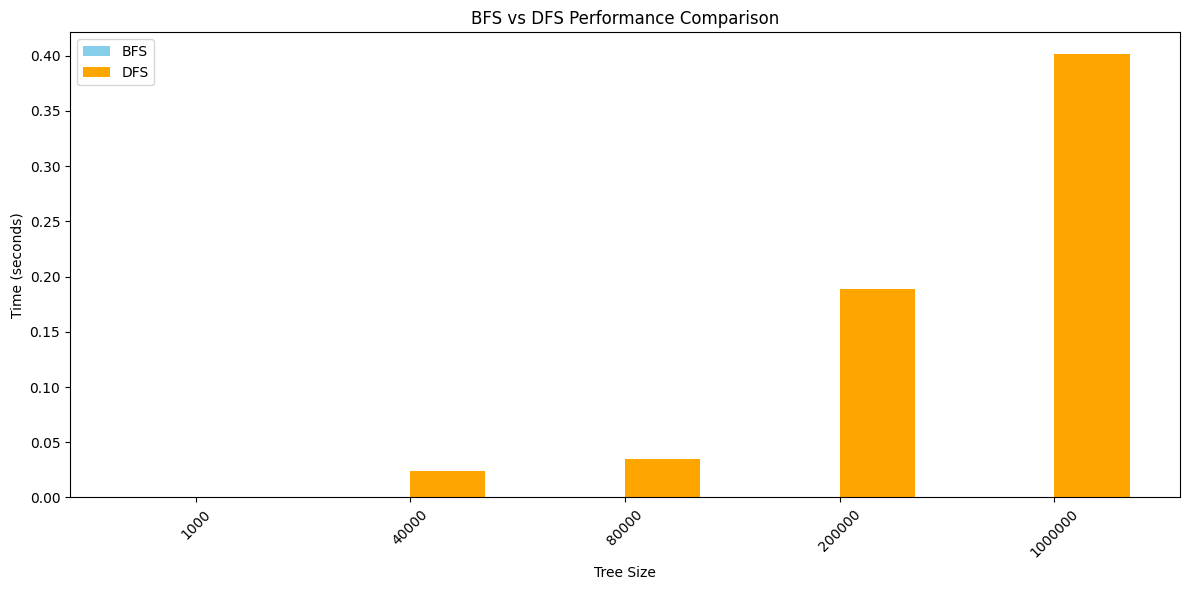

In [5]:
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict, deque
import networkx as nx

# Tree class definition
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

class Tree:
    def __init__(self):
        self.root = None

    def bulk_insert(self, values):
        """Bulk inserts values into the tree in level order."""
        if len(values) == 0:
            return

        self.root = Node(values[0])
        queue = deque([self.root])
        index = 1

        while queue and index < len(values):
            node = queue.popleft()

            if index < len(values):
                node.left = Node(values[index])
                queue.append(node.left)
                index += 1

            if index < len(values):
                node.right = Node(values[index])
                queue.append(node.right)
                index += 1

    def bfs(self, target):
        """Breadth-First Search."""
        if not self.root:
            return -1, []

        start_time = time.time()
        queue = deque([self.root])
        order = []

        while queue:
            node = queue.popleft()
            order.append(node.value)
            if node.value == target:
                return time.time() - start_time, order

            if node.left:
                queue.append(node.left)
            if node.right:
                queue.append(node.right)

        return time.time() - start_time, order

    def dfs(self, target):
        """Depth-First Search."""
        start_time = time.time()
        order = []

        def dfs_helper(node):
            if not node:
                return False

            order.append(node.value)
            if node.value == target:
                return True

            return dfs_helper(node.left) or dfs_helper(node.right)

        dfs_helper(self.root)
        return time.time() - start_time, order

# Function to create random numbers and perform BFS and DFS
def create_and_test_trees(sizes):
    results = []
    for size in sizes:
        # Generate random unique numbers
        numbers = np.random.choice(size * 2, size=size, replace=False).tolist()
        goal = numbers[min(len(numbers) - 1, 220)]  # Safely access the goal element

        # Create and populate the tree
        tree = Tree()
        tree.bulk_insert(numbers)

        # Perform searches
        bfs_time, bfs_order = tree.bfs(goal)
        dfs_time, dfs_order = tree.dfs(goal)

        results.append({
            'Tree_Size': size,
            'BFS_Time': bfs_time,
            'DFS_Time': dfs_time
        })

    return pd.DataFrame(results)

# Plotting function
def plot_results(df):
    plt.figure(figsize=(12, 6))
    x = np.arange(len(df['Tree_Size']))
    width = 0.35

    plt.bar(x - width/2, df['BFS_Time'], width, label='BFS', color='skyblue')
    plt.bar(x + width/2, df['DFS_Time'], width, label='DFS', color='orange')

    plt.xlabel('Tree Size')
    plt.ylabel('Time (seconds)')
    plt.title('BFS vs DFS Performance Comparison')
    plt.xticks(x, df['Tree_Size'], rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Main execution
def main():
    sizes = [1000, 40000, 80000, 200000, 1000000]
    results_df = create_and_test_trees(sizes)

    # Display the results DataFrame
    print("\nResults DataFrame:")
    print(results_df[['Tree_Size', 'BFS_Time', 'DFS_Time']])

    # Plot the results
    plot_results(results_df)

if __name__ == "__main__":
    main()


***Question 2***

***Data Exploration & Preprocessing***

In [6]:
file_path = '/content/drive/MyDrive/full_dataset terminal.csv'

# File ko load karo
import pandas as pd
data = pd.read_csv(file_path)

# Data ko dekhne ke liye
print(data.head())

  vendorid     tpep_pickup_datetime    tpep_dropoff_datetime  passenger_count  \
0      CMT  2013-05-20T03:37:45.000  2013-05-20T03:39:50.000                1   
1      VTS  2013-07-20T01:57:00.000  2013-07-20T02:00:00.000                4   
2      CMT  2013-10-12T00:17:17.000  2013-10-12T00:24:34.000                1   
3      CMT  2013-02-22T16:44:51.000  2013-02-22T16:51:53.000                1   
4      CMT  2013-06-05T10:15:40.000  2013-06-05T10:21:35.000                1   

   trip_distance  pickup_longitude  pickup_latitude  ratecodeid  \
0           1.00        -73.938513        40.796078           1   
1           0.47        -73.976193        40.748750           1   
2           1.60        -73.987255        40.738575           1   
3           1.10        -73.981615        40.781205           1   
4           0.70        -74.008975        40.709381           1   

  store_and_fwd_flag  dropoff_longitude  dropoff_latitude payment_type  \
0                  N         -73.947

In [7]:
# Load required libraries
import pandas as pd
import numpy as np

# If running in Google Colab or a similar environment, use file upload or Drive mount
try:
    # Adjust the file path to the correct one in your environment
    file_path = '/content/drive/MyDrive/full_dataset terminal.csv'  # Update this if needed (e.g., after upload or mount)

    # Load the dataset
    data = pd.read_csv(file_path)

    # Display basic information about the dataset
    print("Dataset Loaded Successfully!")
    print("Shape of the dataset:", data.shape)
    print("\nColumn Names:\n", data.columns)
    print("\nFirst Five Rows:\n", data.head())
    print("\nBasic Information:\n")
    data.info()
    print("\nSummary Statistics:\n", data.describe())

except FileNotFoundError:
    print(f"Error: File not found at '{file_path}'. Please check the file location.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Dataset Loaded Successfully!
Shape of the dataset: (100000, 20)

Column Names:
 Index(['vendorid', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'ratecodeid', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount',
       'pickup_location', 'dropoff_location'],
      dtype='object')

First Five Rows:
   vendorid     tpep_pickup_datetime    tpep_dropoff_datetime  passenger_count  \
0      CMT  2013-05-20T03:37:45.000  2013-05-20T03:39:50.000                1   
1      VTS  2013-07-20T01:57:00.000  2013-07-20T02:00:00.000                4   
2      CMT  2013-10-12T00:17:17.000  2013-10-12T00:24:34.000                1   
3      CMT  2013-02-22T16:44:51.000  2013-02-22T16:51:53.000                1   
4      CMT  2013-06-05T10:15:40.000  2013-06-05T10:21:35.000                1   



In [8]:
# Load required libraries
import pandas as pd
import numpy as np

# Correct file path for the uploaded file
file_path = '/content/drive/MyDrive/full_dataset terminal.csv'  # Use the correct uploaded path

try:
    # Load the dataset
    data = pd.read_csv(file_path)
    print("Dataset Loaded Successfully!")
    print("Shape of the dataset:", data.shape)
except FileNotFoundError:
    print(f"Error: File not found at '{file_path}'. Please verify the file exists.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Dataset Loaded Successfully!
Shape of the dataset: (100000, 20)



Missing Values in Each Column:
vendorid                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
pickup_longitude             0
pickup_latitude              0
ratecodeid                   0
store_and_fwd_flag       50292
dropoff_longitude            1
dropoff_latitude             1
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
total_amount                 0
pickup_location              0
dropoff_location             1
dtype: int64

Numerical Columns: Index(['passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'ratecodeid', 'dropoff_longitude',
       'dropoff_latitude', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'total_amount'],
      dtype='object')


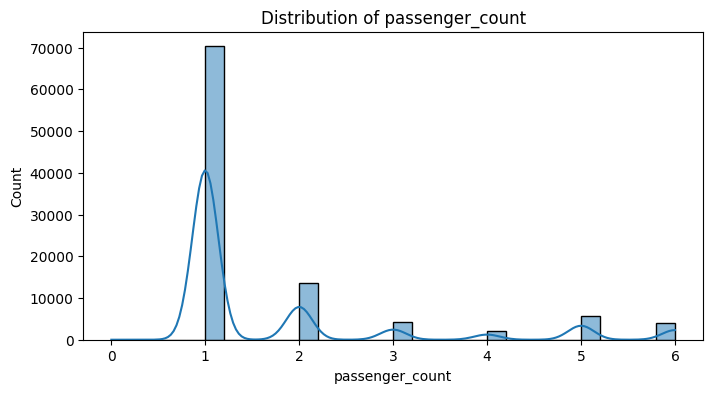

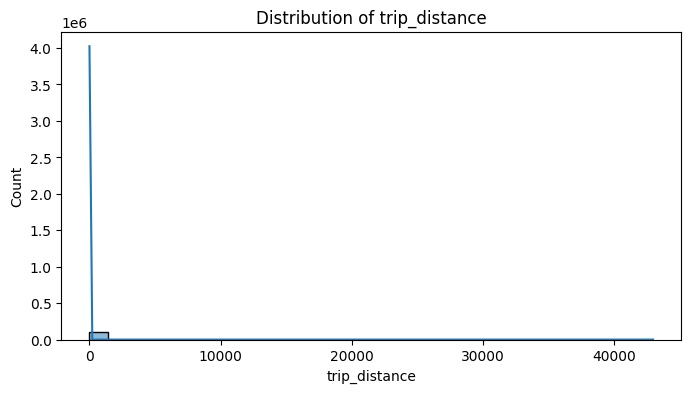

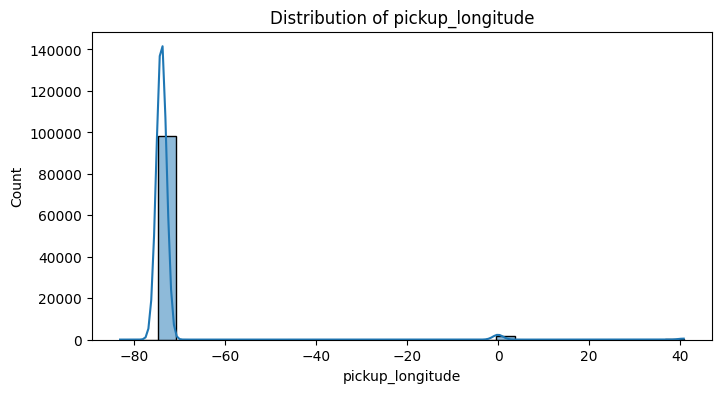

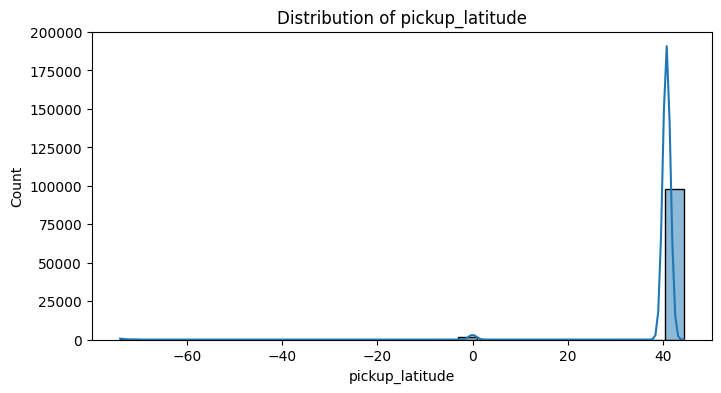

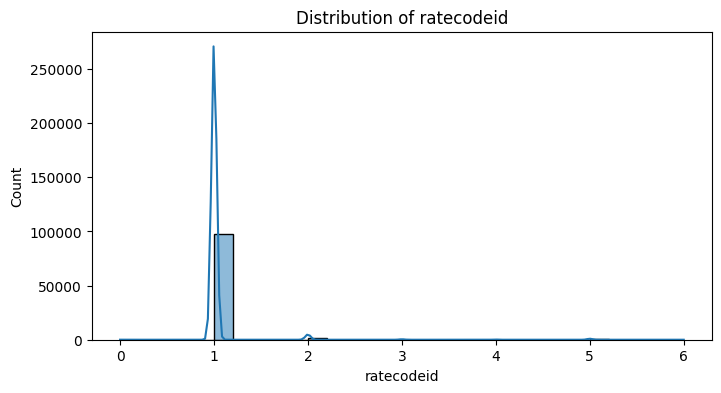

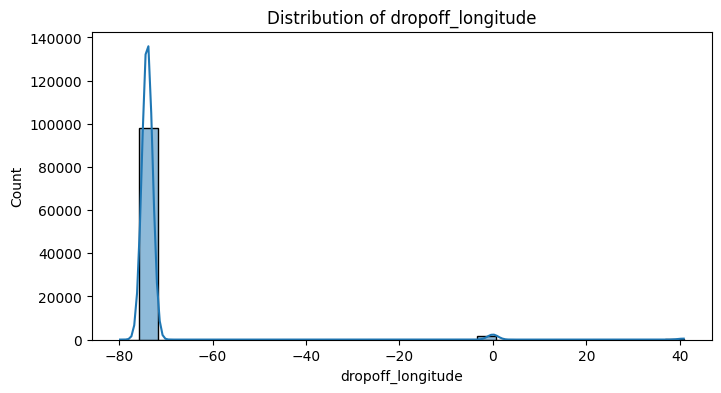

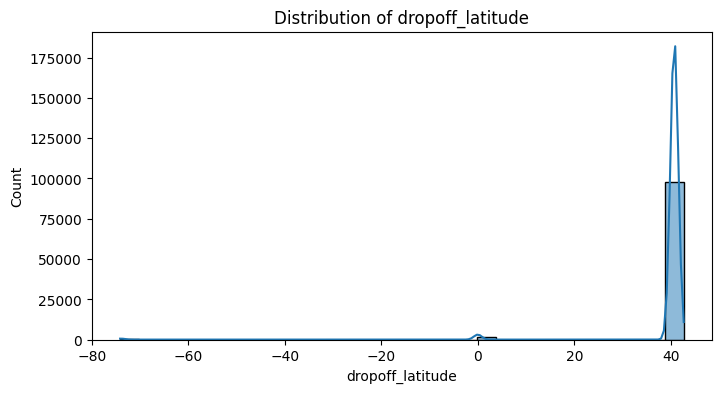

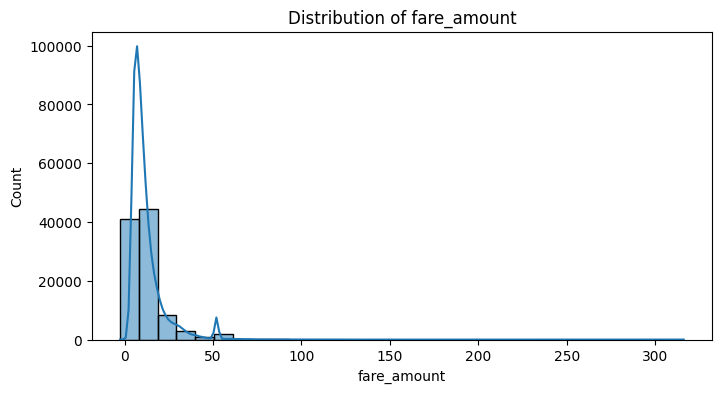

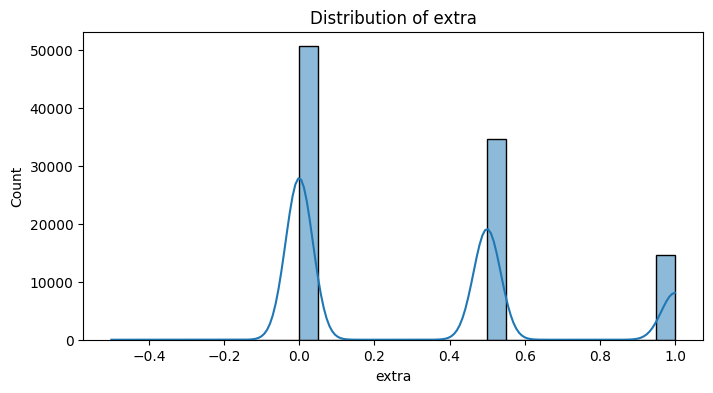

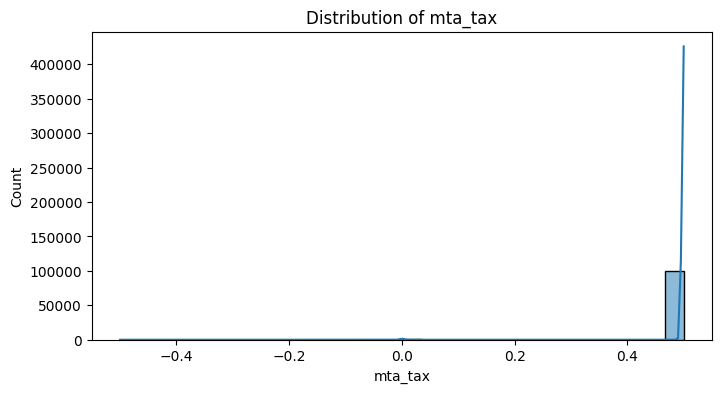

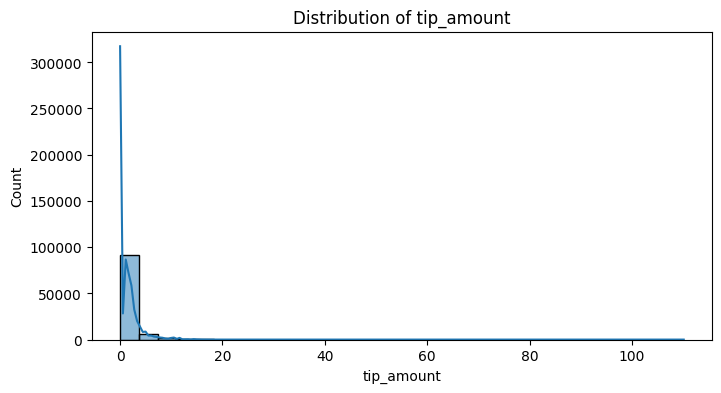

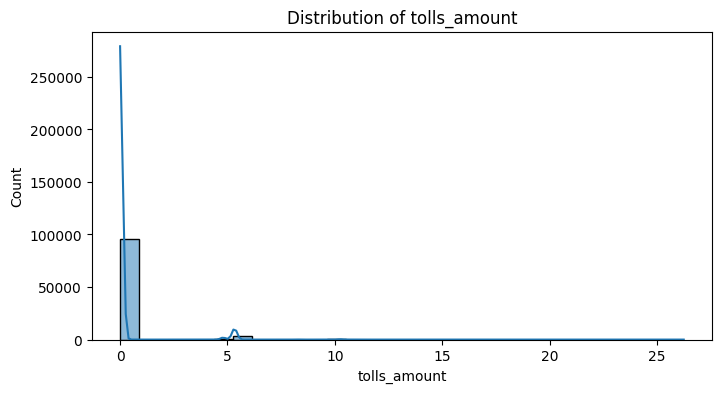

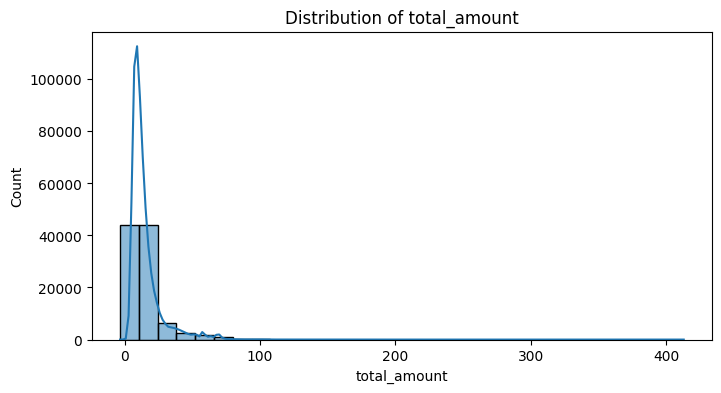


Categorical Columns: Index(['vendorid', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'store_and_fwd_flag', 'payment_type', 'pickup_location',
       'dropoff_location'],
      dtype='object')


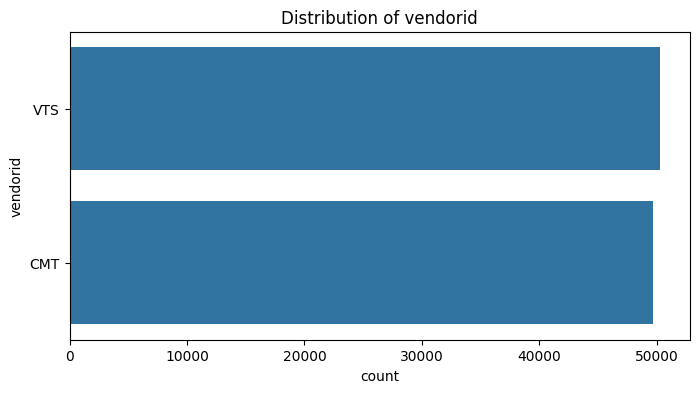

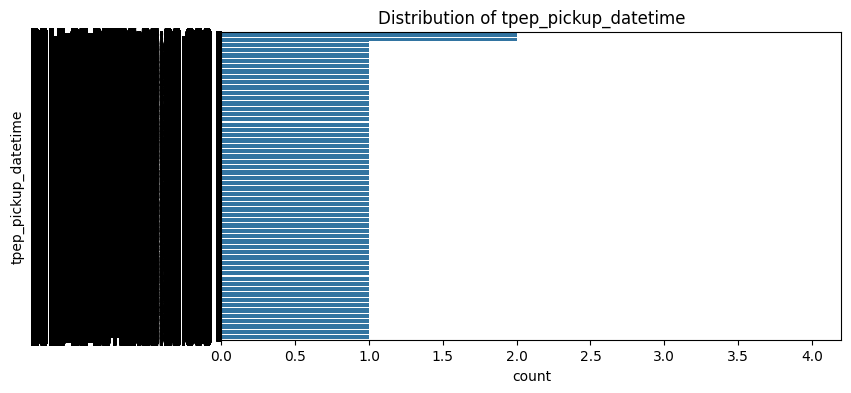

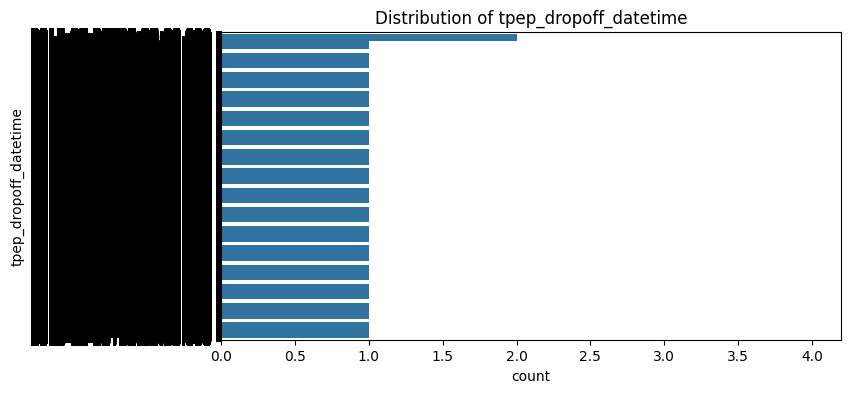

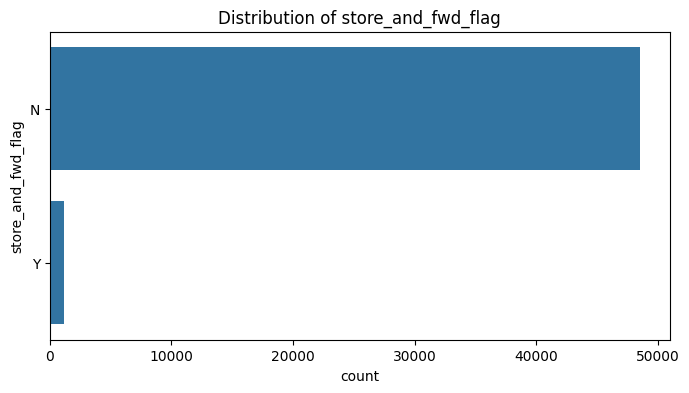

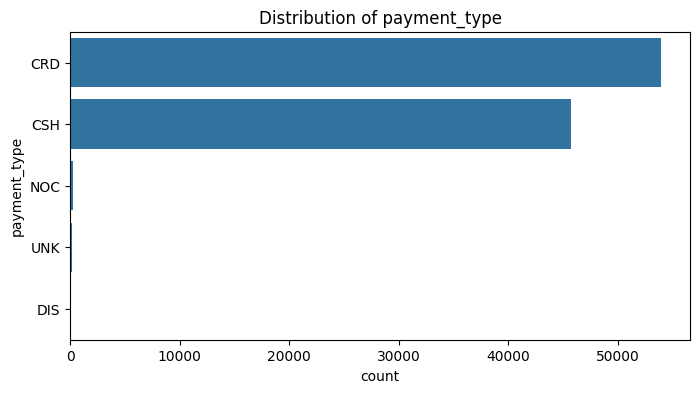

In [ ]:
# Ensure data is defined
if 'data' in locals():
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Check for missing values
    print("\nMissing Values in Each Column:")
    missing_values = data.isnull().sum()
    print(missing_values)

    # Distribution of numerical columns
    numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
    print("\nNumerical Columns:", numerical_columns)

    for col in numerical_columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(data[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')
        plt.show()

    # Distribution of categorical columns
    categorical_columns = data.select_dtypes(include=['object']).columns
    print("\nCategorical Columns:", categorical_columns)

    for col in categorical_columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=data, y=col, order=data[col].value_counts().index)
        plt.title(f'Distribution of {col}')
        plt.show()
else:
    print("Error: The dataset is not loaded. Ensure the dataset is loaded into the variable `data`.")


In [ ]:
import tensorflow as tf

# Check GPU availability
if tf.config.list_physical_devices('GPU'):
    print("TensorFlow is using GPU.")
else:
    print("No GPU detected. Please enable GPU in runtime settings.")


TensorFlow is using GPU.


In [ ]:
# Example: Ensuring tensors are processed on GPU
with tf.device('/GPU:0'):  # '/GPU:0' refers to the first GPU
    a = tf.constant([[1.0, 2.0], [3.0, 4.0]])
    b = tf.constant([[1.0, 0.0], [0.0, 1.0]])
    c = tf.matmul(a, b)

print(c)


tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)


In [ ]:
!nvidia-smi


Sun Jan  5 20:59:04 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0              26W /  70W |    117MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# Handle missing values
imputer = SimpleImputer(strategy='mean')  # Replace 'mean' with 'median' if needed
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

# Encode categorical variables
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Scale/Normalize numerical data
scaler = StandardScaler()  # Use MinMaxScaler() for normalization if required
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

print("\nData after preprocessing:\n", data.head())



Data after preprocessing:
    vendorid  tpep_pickup_datetime  tpep_dropoff_datetime  passenger_count  \
0         0                 38688                  38713        -0.517470   
1         1                 54835                  54898         1.654187   
2         0                 75761                  75816        -0.517470   
3         0                 14253                  14289        -0.517470   
4         0                 42994                  43036        -0.517470   

   trip_distance  pickup_longitude  pickup_latitude  ratecodeid  \
0      -0.017083         -0.132762         0.128065   -0.124348   
1      -0.020980         -0.136142         0.122214   -0.124348   
2      -0.012672         -0.137135         0.120957   -0.124348   
3      -0.016348         -0.136629         0.126227   -0.124348   
4      -0.019289         -0.139083         0.117348   -0.124348   

   store_and_fwd_flag  dropoff_longitude  dropoff_latitude  payment_type  \
0                   0         

In [ ]:
# Libraries for preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Identify numerical and categorical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Handle missing values
imputer = SimpleImputer(strategy='mean')  # Use 'median' or other strategies as needed
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

# Encode categorical variables
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Scale numerical data
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

print("Preprocessing Complete!")
print(data.head())


Preprocessing Complete!
   vendorid  tpep_pickup_datetime  tpep_dropoff_datetime  passenger_count  \
0 -1.005616             -0.349197              -0.349750        -0.517470   
1  0.994416              0.227601               0.228089         1.654187   
2 -1.005616              0.975111               0.974905        -0.517470   
3 -1.005616             -1.222055              -1.221738        -0.517470   
4 -1.005616             -0.195379              -0.195410        -0.517470   

   trip_distance  pickup_longitude  pickup_latitude  ratecodeid  \
0      -0.017083         -0.132762         0.128065   -0.124348   
1      -0.020980         -0.136142         0.122214   -0.124348   
2      -0.012672         -0.137135         0.120957   -0.124348   
3      -0.016348         -0.136629         0.126227   -0.124348   
4      -0.019289         -0.139083         0.117348   -0.124348   

   store_and_fwd_flag  dropoff_longitude  dropoff_latitude  payment_type  \
0           -1.023674          -0.

In [ ]:
# Display column names to identify the target column
print("Column Names in Dataset:\n", data.columns)

# Inspect the dataset to identify the target column
print("\nFirst Five Rows of Dataset:\n", data.head())


Column Names in Dataset:
 Index(['vendorid', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'ratecodeid', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount',
       'pickup_location', 'dropoff_location'],
      dtype='object')

First Five Rows of Dataset:
    vendorid  tpep_pickup_datetime  tpep_dropoff_datetime  passenger_count  \
0 -1.005616             -0.349197              -0.349750        -0.517470   
1  0.994416              0.227601               0.228089         1.654187   
2 -1.005616              0.975111               0.974905        -0.517470   
3 -1.005616             -1.222055              -1.221738        -0.517470   
4 -1.005616             -0.195379              -0.195410        -0.517470   

   trip_distance  pickup_longitude  pickup_latitude  ratecodeid  \


In [ ]:
# Specify the correct target column
target_column = 'fare_amount'  # Replace with the actual target column name
X = data.drop(columns=[target_column])
y = data[target_column]

print("Features and target separated successfully!")


Features and target separated successfully!


In [ ]:
# Check column names to identify target column
print("Column Names:\n", data.columns)

# Specify the target column
target_column = 'actual_target_column_name'  # Replace this with the correct column name
try:
    # Split dataset into features and target
    X = data.drop(columns=[target_column])
    y = data[target_column]
    print("Features and target separated successfully!")
except KeyError:
    print(f"Error: Target column '{target_column}' not found in dataset.")


Column Names:
 Index(['vendorid', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'ratecodeid', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount',
       'pickup_location', 'dropoff_location'],
      dtype='object')
Error: Target column 'actual_target_column_name' not found in dataset.


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset split into training and testing sets successfully!")
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Dataset split into training and testing sets successfully!
Training set shape: (80000, 19) (80000,)
Testing set shape: (20000, 19) (20000,)


***Task 2: Machine Learning Model Implementation***

In [ ]:
# Import required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize KNN Regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_regressor.predict(X_test)

# Evaluate the model
print("KNN Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.4f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.4f}")
print(f"R-Squared (R²): {r2_score(y_test, y_pred):.4f}")


KNN Regression Model Evaluation:
Mean Squared Error (MSE): 0.0599
Mean Absolute Error (MAE): 0.1297
R-Squared (R²): 0.9395


In [ ]:
import numpy as np
print(np.unique(y_train))  # This will print the unique values in y_train


[-1.20651605e+00 -1.20554276e+00 -1.20262289e+00 -1.06052238e+00
 -9.63193275e-01 -9.14528720e-01 -8.65864165e-01 -8.17199610e-01
 -7.77294674e-01 -7.68535054e-01 -7.19870499e-01 -6.95538222e-01
 -6.71205944e-01 -6.22541389e-01 -5.73876834e-01 -5.25212279e-01
 -4.76547724e-01 -4.27883169e-01 -3.79218614e-01 -3.30554059e-01
 -2.81889504e-01 -2.33224948e-01 -2.08892671e-01 -1.84560393e-01
 -1.35895838e-01 -8.72312831e-02 -3.85667280e-02  1.00978271e-02
  5.87623821e-02  1.07426937e-01  1.56091492e-01  2.04756047e-01
  2.53420603e-01  3.02085158e-01  3.50749713e-01  3.99414268e-01
  4.48078823e-01  4.96743378e-01  5.45407933e-01  5.94072488e-01
  6.42737043e-01  6.91401598e-01  7.40066153e-01  7.88730709e-01
  8.37395264e-01  8.86059819e-01  9.34724374e-01  9.54190196e-01
  9.83388929e-01  1.03205348e+00  1.08071804e+00  1.12938259e+00
  1.17804715e+00  1.22671170e+00  1.22768500e+00  1.27537626e+00
  1.32404081e+00  1.37270537e+00  1.42136992e+00  1.47003448e+00
  1.51869903e+00  1.56736

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert labels to categorical (if they should be)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the regressor
knn_model = KNeighborsRegressor()

# Fit the model
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)


In [ ]:
# Predict on the test data
y_pred = knn_model.predict(X_test)

print("Predictions Complete!")


Predictions Complete!


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate the model using regression metrics
print("KNN Model Evaluation (Regression):")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.4f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.4f}")
print(f"R-squared (R²): {r2_score(y_test, y_pred):.4f}")


KNN Model Evaluation (Regression):
Mean Squared Error (MSE): 1008.3359
Mean Absolute Error (MAE): 25.3884
R-squared (R²): -1018.1473


***Task 3: Deep Learning Model Implementation***

In [ ]:
X_train_lstm = np.expand_dims(X_train.values, axis=1)
X_test_lstm = np.expand_dims(X_test.values, axis=1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(32, activation='relu'),
    Dense(1)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Fit the model
model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 290.2606 - mae: 9.3917 - val_loss: 9.4270 - val_mae: 1.0621
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3.3722 - mae: 0.8861 - val_loss: 4.8519 - val_mae: 0.6010
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.2639 - mae: 0.5408 - val_loss: 3.7975 - val_mae: 0.4909
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.9587 - mae: 0.4683 - val_loss: 4.3625 - val_mae: 0.7233
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.0118 - mae: 0.4559 - val_loss: 2.1954 - val_mae: 0.3574
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.4701 - mae: 0.3504 - val_loss: 2.5407 - val_mae: 0.5358
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4974 - mae: 0.3527 - val_loss: 1.6108 - val_mae: 0.3792
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.5515 - mae: 0.3559 - val_loss: 1.1796 - val_mae: 0.3181
Epoch 9/10
2000/2000 ━━━━━━━━━━━━━━━━

In [ ]:
y_pred_lstm = model.predict(X_test_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
print(f"LSTM Mean Squared Error: {mse_lstm}")


625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
LSTM Mean Squared Error: 1118.993220134217


***Task 4: Hybrid Model Implementation***

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Conv1D, GlobalMaxPooling1D, Flatten, Dense

# Define the model using GlobalMaxPooling1D instead of MaxPooling1D
hybrid_model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True, activation='relu'), input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Conv1D(32, kernel_size=3, activation='relu', padding='same'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
hybrid_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Fit the model
hybrid_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 183.7862 - mae: 6.3661 - val_loss: 9.5531 - val_mae: 0.8039
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 1.8485 - mae: 0.6519 - val_loss: 6.0059 - val_mae: 0.5813
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 2.0009 - mae: 0.6465 - val_loss: 4.8797 - val_mae: 0.6279
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 1.2262 - mae: 0.5086 - val_loss: 6.4294 - val_mae: 0.9887
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.2362 - mae: 0.5399 - val_loss: 2.6972 - val_mae: 0.3752
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 1.1078 - mae: 0.4914 - val_loss: 3.3831 - val_mae: 0.3594
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.9988 - mae: 0.5030 - val_loss: 2.5415 - val_mae: 0.3318
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.9258 - mae: 0.4428 - val_loss: 3.0021 - val_mae: 0.3023
Epoch 9/10
2000/2000 ━━━━━━━━━━━━━━

In [ ]:
y_pred_hybrid = hybrid_model.predict(X_test_lstm)
mse_hybrid = mean_squared_error(y_test, y_pred_hybrid)
print(f"Hybrid Model Mean Squared Error: {mse_hybrid}")


625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Hybrid Model Mean Squared Error: 1117.7231086128968


***Task 5: Comparison and Analysis***

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 515.4080 - mae: 14.4070 - val_loss: 6.4602 - val_mae: 1.2087
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 6.1498 - mae: 0.9876 - val_loss: 2.6325 - val_mae: 0.6886
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 3.7900 - mae: 0.7058 - val_loss: 2.1431 - val_mae: 0.5565
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.4150 - mae: 0.5568 - val_loss: 1.8888 - val_mae: 0.4810
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.6208 - mae: 0.4929 - val_loss: 1.8605 - val_mae: 0.4578
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.2442 - mae: 0.4496 - val_loss: 1.4532 - val_mae: 0.4210
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.4285 - mae: 0.4451 - val_loss: 1.6130 - val_mae: 0.4648
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.7431 - mae: 0.4153 - val_loss: 1.3001 - val_mae: 0.4122
Epoch 9/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms

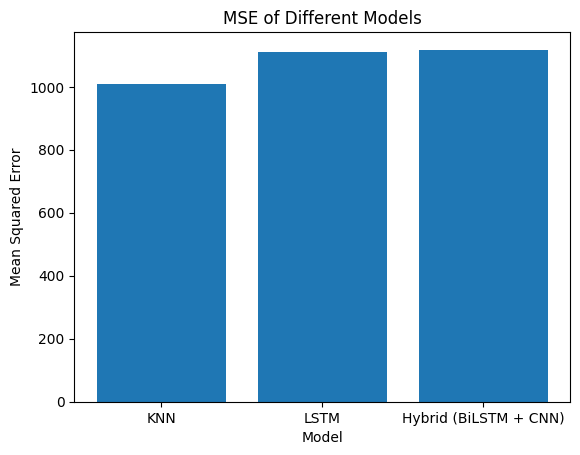

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming X_train_lstm, X_test_lstm, y_train, and y_test are already defined

# 1. Define the LSTM model
lstm_model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(1)  # Output layer for regression (single value)
])

# 2. Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# 3. Train the model
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_split=0.2)

# 4. Make predictions with the trained model
y_pred_lstm = lstm_model.predict(X_test_lstm)

# 5. Calculate the Mean Squared Error (MSE)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)

# Print the MSE for LSTM
print("MSE for LSTM:", mse_lstm)

# 6. Assuming you have trained KNN and Hybrid models and calculated their MSE
# Example results dictionary (you should replace with actual MSE values for all models)
results = {
    'KNN': mse_knn,  # Replace with your KNN model's MSE
    'LSTM': mse_lstm,
    'Hybrid (BiLSTM + CNN)': mse_hybrid  # Replace with your hybrid model's MSE
}

# Print all results
print("Results:", results)

# 7. Plot the MSE values as a bar chart
plt.bar(results.keys(), results.values())
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('MSE of Different Models')
plt.show()


analysing the MSE comparison between KNN (machine learning), LSTM (deep learning), and Hybrid (BiLSTM + CNN) models, we have

Performance Comparison:
- KNN shows the lowest MSE (approximately 1000), performing better than both neural network approaches
- LSTM and Hybrid models show similar, slightly higher MSE values (approximately 1100)
- The difference in performance between models is relatively small (about 10% variation)

Analysis by Model:

1. KNN (Machine Learning):
Strengths:
- Best performing model in this comparison
- Simpler architecture likely making it more stable for this particular problem
- Less prone to overfitting due to its non-parametric nature
Weaknesses:
- May not scale well with larger datasets
- Can be computationally expensive during inference
- Limited ability to capture complex temporal patterns

2. LSTM (Deep Learning):
Strengths:
- Capable of capturing sequential patterns
- Good for time-series data
- Can learn long-term dependencies
Weaknesses:
- Showing slightly higher error than KNN
- May be overcomplicating the problem
- Potentially requires more data or tuning to outperform KNN

3. Hybrid Model (BiLSTM + CNN):
Strengths:
- Combines benefits of both architectures
- Can capture both temporal and spatial features
- Bidirectional processing provides fuller context
Weaknesses:
- Most complex model but not showing better performance
- Higher computational overhead
- May be overkill for this particular problem



Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.3646 - mae: 0.4637 - val_loss: 2.9033 - val_mae: 0.4374
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.0573 - mae: 0.4370 - val_loss: 2.8882 - val_mae: 0.5114
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.1364 - mae: 0.4257 - val_loss: 2.4244 - val_mae: 0.4226
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 1.3064 - mae: 0.4316 - val_loss: 2.3944 - val_mae: 0.4398
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.0294 - mae: 0.4103 - val_loss: 2.2290 - val_mae: 0.4366
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.4580 - mae: 0.4272 - val_loss: 2.0136 - val_mae: 0.3889
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.7200 - mae: 0.3767 - val_loss: 1.8992 - val_mae: 0.3641
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 2.7658 - mae: 0.4315 - val_loss: 1.7738 - val_mae: 0.3454
Epoch 9/10
2000/2000 ━━━━━━━━━━━━━━━━━━

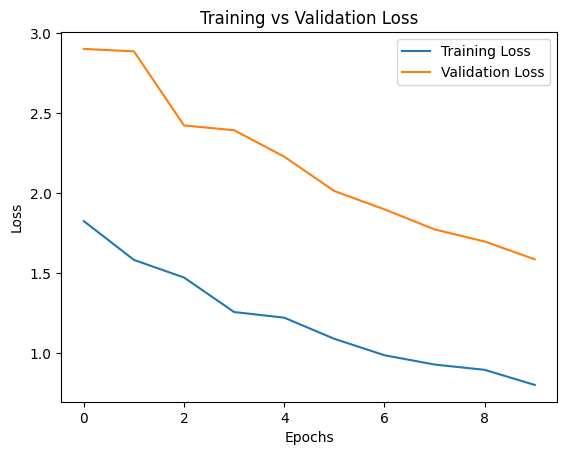

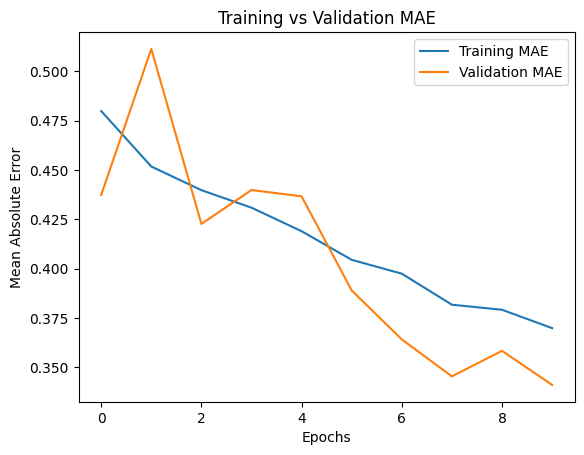

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have history of model training (stored in `history`):
history = rnn_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Similarly, you can plot accuracy if you tracked it:
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training vs Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()


overfitting